In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
ford=pd.read_csv("ford.csv")
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [28]:
fordData=pd.DataFrame(ford)
fordData.dropna(inplace=True)
fordData.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,17966,17966.000000,17966.000000,17966,17966.000000,17966,17966.000000,17966.000000,17966.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,6557,NaN,NaN,15518,NaN,12179,NaN,NaN,NaN
mean,NaN,2016.866470,12279.534844,NaN,23362.608761,NaN,113.329456,57.906980,1.350807
std,NaN,2.050336,4741.343657,NaN,19472.054349,NaN,62.012456,10.125696,0.432367
min,NaN,1996.000000,495.000000,NaN,1.000000,NaN,0.000000,20.800000,0.000000
25%,NaN,2016.000000,8999.000000,NaN,9987.000000,NaN,30.000000,52.300000,1.000000
50%,NaN,2017.000000,11291.000000,NaN,18242.500000,NaN,145.000000,58.900000,1.200000
75%,NaN,2018.000000,15299.000000,NaN,31060.000000,NaN,145.000000,65.700000,1.500000


In [29]:
fuel_counts = fordData['fuelType'].value_counts()
fuel_counts

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

### fuelType sütununda yalnızca 'Petrol' ve 'Diesel' olmak üzere iki farklı türe indirdik. Bunun sebebi diğer türlerde çok az sayıda veri satırı olduğu için modelin doğruluk oranını düşürecekti.

In [30]:
fordData.drop(fordData[fordData['fuelType'].isin(['Hybrid','Electric', 'Other'])].index, inplace=True)
fuel_counts = fordData['fuelType'].value_counts()
fuel_counts

fuelType
Petrol    12179
Diesel     5762
Name: count, dtype: int64

### Veri setindeki 'fuelType' satırı string türünde veri içerdiği için bunları 0 ve 1 olmak üzere integer verilere dönüştürdük. Arkasında hiçbir matematik yok keyfi bir dönüştürme seçimi oldu.

Petrol -> 0
Diesel -> 1


In [31]:
FuelTypeDict={'Diesel':1,'Petrol':0}
fordData['fuelType'] = fordData['fuelType'].map(FuelTypeDict)
fordData.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,0,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,0,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,0,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,0,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,0,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,0,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,1,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,0,145,61.4,1.0


In [32]:
TransType_counts = fordData['transmission'].value_counts()
TransType_counts

transmission
Manual       15517
Automatic     1339
Semi-Auto     1085
Name: count, dtype: int64

### Veri setindeki 'transmission' satırı string türünde veri içerdiği için bunları 0,1 ve 2 olmak üzere integer verilere dönüştürdük. Arkasında hiçbir matematik yok keyfi bir dönüştürme seçimi oldu.

Semi-Auto -> 0
Manual -> 1
Automatic -> 2

In [33]:
TransmissionTypeDict={'Manual':1,'Automatic':2,'Semi-Auto':0}
fordData['transmission'] = fordData['transmission'].map(TransmissionTypeDict)
fordData.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,2,15944,0,150,57.7,1.0
1,Focus,2018,14000,1,9083,0,150,57.7,1.0
2,Focus,2017,13000,1,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,1,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,2,1482,0,145,48.7,1.0
5,Fiesta,2015,10500,1,35432,0,145,47.9,1.6
6,Puma,2019,22500,1,2029,0,145,50.4,1.0
7,Fiesta,2017,9000,1,13054,0,145,54.3,1.2
8,Kuga,2019,25500,2,6894,1,145,42.2,2.0
9,Focus,2018,10000,1,48141,0,145,61.4,1.0


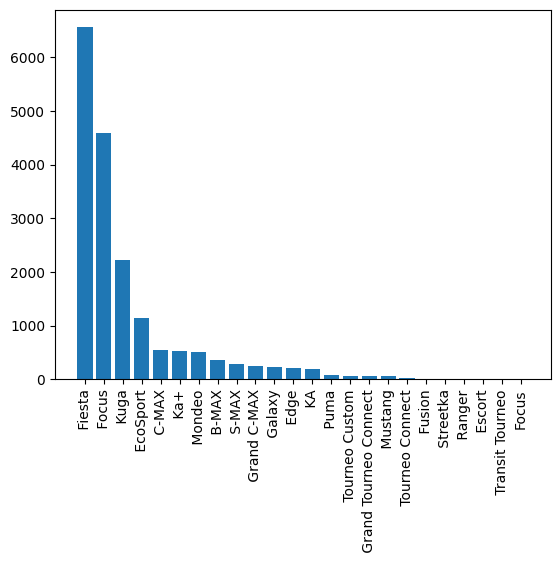

In [34]:
model_counts = fordData['model'].value_counts()

plt.bar(model_counts.index, model_counts.values)
plt.xticks(rotation=90)
plt.show()


 ##### Model türleri 4'e indirildi. Bunun sebebi ise diğer model türleri çok az sayıda veri satırı içeriyordu ve bu durum modelimizin doğruluk oranını düşürecekti. Kategori türlerinin ilk iki harfi ASCII kodlarına dönüştürüldü . Bunlar;
“Fiesta” için “FI” harfleri 70 ve 73 ASCII kodlarına dönüşecektir.

“Focus” için “FO” harfleri 70 ve 79 ASCII kodlarına dönüşecektir.

“Kuga” için “KU” harfleri 75 ve 85 ASCII kodlarına dönüşecektir.

“EcoSport” için “EC” harfleri 69 ve 67 ASCII kodlarına dönüşecektir.


In [35]:
models_to_keep = [' Fiesta', ' Focus', ' Kuga', ' EcoSport']
fordData = fordData[fordData['model'].isin(models_to_keep)]
model_to_ascii={' Fiesta':7073,' Focus':7079,' Kuga':7585,' EcoSport':6967}
fordData['model'] = fordData['model'].map(model_to_ascii)
model_counts = fordData['model'].value_counts()
model_counts

model
7073    6557
7079    4588
7585    2220
6967    1143
Name: count, dtype: int64

### Yıl grafiğinde bazı yıllara ait çok az sayıda veri vardı bu modelin doğruluk oranını düşüreceği için o veri satırlarını veri setinin içinden atmamız lazım!

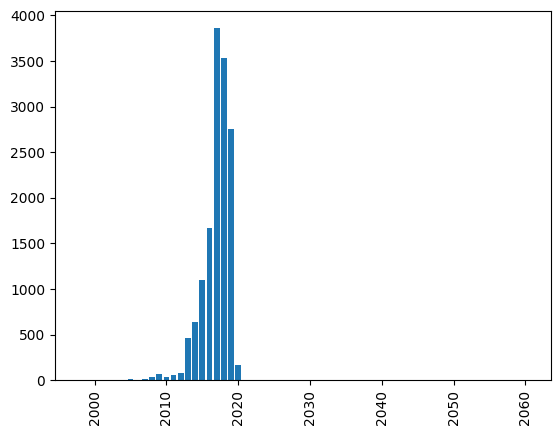

In [36]:
year_counts = fordData['year'].value_counts()

plt.bar(year_counts.index, year_counts.values)
plt.xticks(rotation=90)
plt.show()

##### Bu şekilde verileri en çok dağılım gösterdiği yıllar arasında yer alan verilere indirgemiş olduk.

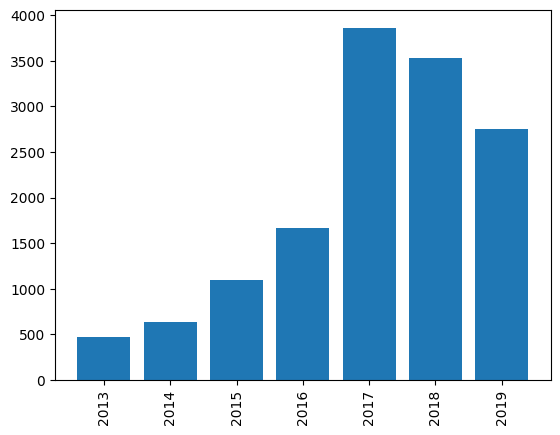

In [37]:
fordData = fordData[(fordData['year'] >= 2013) & (fordData['year'] < 2020)]
year_counts = fordData['year'].value_counts()

plt.bar(year_counts.index, year_counts.values)
plt.xticks(rotation=90)
plt.show()

### Dataframe'in model tarafından işlenebilir hale getirdikten sonra, 'fordData_Refined.csv' isimli dosyayı oluşturup  içerisine yazdırdık.

In [38]:
fordData.to_csv('fordData_Refined.csv',index=False)
fordData.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000
mean,7146.845506,2017.099358,12282.738017,1.009415,21351.695150,0.271541,112.691155,58.839051,1.287175
std,191.385964,1.550551,3928.551835,0.340017,15859.679176,0.444770,60.069456,9.606689,0.375336
min,6967.000000,2013.000000,2995.000000,0.000000,1.000000,0.000000,0.000000,28.800000,0.000000
25%,7073.000000,2016.000000,9450.000000,1.000000,10000.000000,0.000000,125.000000,54.300000,1.000000
50%,7073.000000,2017.000000,11498.000000,1.000000,17330.000000,0.000000,145.000000,60.100000,1.000000
75%,7079.000000,2018.000000,15000.000000,1.000000,29001.000000,1.000000,145.000000,65.700000,1.500000
max,7585.000000,2019.000000,54995.000000,2.000000,130000.000000,1.000000,265.000000,88.300000,2.300000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [40]:
X = fordData[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = fordData['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ortalama Mutlak Hata: {mae}')
print(f'Ortalama Kare Hata: {mse}')
print(f'R^2 Skoru: {r2}')

Ortalama Mutlak Hata: 1397.3034459124863
Ortalama Kare Hata: 3356805.4355820017
R^2 Skoru: 0.7757086813122589


In [42]:
mlp_model = MLPRegressor(hidden_layer_sizes=(80, 70), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred = mlp_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ortalama Mutlak Hata: {mae}')
print(f'Ortalama Kare Hata: {mse}')
print(f'R^2 Skoru: {r2}')

Ortalama Mutlak Hata: 984.8815349482404
Ortalama Kare Hata: 1845360.8131490136
R^2 Skoru: 0.8766987190116626


c:\Users\husey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [45]:

model = Sequential()

model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=30, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ortalama Mutlak Hata: {mae}')
print(f'Ortalama Kare Hata: {mse}')
print(f'R^2 Skoru: {r2}')


Epoch 1/100


c:\Users\husey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 158133056.0000 - val_loss: 19307422.0000
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9154050.0000 - val_loss: 4745749.5000
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4277485.5000 - val_loss: 3632560.5000
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3225536.2500 - val_loss: 3170230.2500
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3044264.0000 - val_loss: 2927253.2500
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2701379.7500 - val_loss: 2797483.5000
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2574773.2500 - val_loss: 2689933.7500
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2414652.0000 - val_loss: 2604668.7500
Epoch 9/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2557723.7500 - val_loss: 2502482.2500
Epoch 10/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2334685.5000 - val_loss: 2468839.0000
Epoch 11/100
262/2